In [1]:
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array, load_img

### Load Data

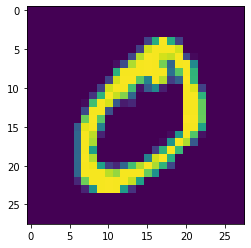

0


In [11]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[1].reshape(28, 28, 1))
plt.show()
print('Classification:', train_labels[1])

### Preprocess data

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
print(train_images.shape)

# one-hot encode labels
# zero,	  one,	    two
# 1,		0,		0
# 0,		1,		0
# 0,		0,		1
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

(60000, 28, 28, 1)


### Create Model

In [5]:
# Model with three layers. input flattened layer, 25 nodes hidden layer, and 10 nodes output layer
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(25, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

2022-04-22 08:23:24.609473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 08:23:24.613773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 08:23:24.613952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 08:23:24.614792: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Train Model

In [6]:
EPOCHS = 20
BATCH_SIZE = 1

# loss function is the same as error function. Mean squared error is a common one, but categorical crossentropy is a good one here as we are classifying into 10 bins
# optimizers are used to determine the learning rate
# we are only interested in accuracy but more metrics can be followed
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# validation is important to let us know if the training is effective and when it is overfitting
history = model.fit(train_images, train_labels, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2,
                    verbose=1, shuffle=True)

# save the model for reuse later
model.save('my_model.h5')

Epoch 1/20
  139/48000 [..............................] - ETA: 52s - loss: 2.0918 - acc: 0.2590

2022-04-22 08:27:42.086672: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


48000/48000 [==============================] - 61s 1ms/step - loss: 0.2973 - acc: 0.9126 - val_loss: 0.1955 - val_acc: 0.9447
Epoch 2/20
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1837 - acc: 0.9477 - val_loss: 0.1725 - val_acc: 0.9513
Epoch 3/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.1553 - acc: 0.9563 - val_loss: 0.1993 - val_acc: 0.9463
Epoch 4/20
48000/48000 [==============================] - 58s 1ms/step - loss: 0.1411 - acc: 0.9606 - val_loss: 0.1720 - val_acc: 0.9558
Epoch 5/20
48000/48000 [==============================] - 58s 1ms/step - loss: 0.1295 - acc: 0.9639 - val_loss: 0.1704 - val_acc: 0.9581
Epoch 6/20
48000/48000 [==============================] - 58s 1ms/step - loss: 0.1231 - acc: 0.9655 - val_loss: 0.1991 - val_acc: 0.9540
Epoch 7/20
48000/48000 [==============================] - 58s 1ms/step - loss: 0.1166 - acc: 0.9681 - val_loss: 0.1713 - val_acc: 0.9607
Epoch 8/20
48000/48000 [============================

### Plot results

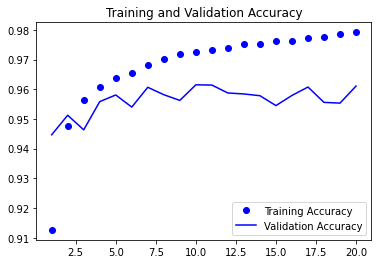

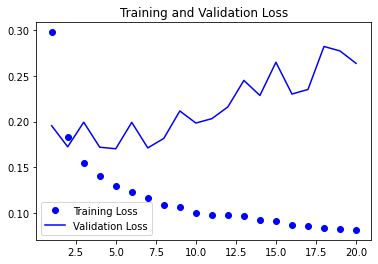

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Test model

/home/lawangin/miniconda3/envs/MnistNumberPrediction/lib/python3.10/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


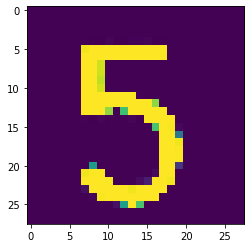

Before expanding dims: (28, 28, 1)
After expanding dims: (1, 28, 28, 1)
predict: [5]


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

img_width, img_height = 28, 28
img = load_img('num5.jpg', True, target_size=(img_width, img_height))

plt.imshow(img)
plt.show()

img_arr = img_to_array(img)
print('Before expanding dims:', img_arr.shape)
img_arr = np.expand_dims(img_arr, axis=0)
print('After expanding dims:', img_arr.shape)

pred_range = model.predict(img_arr).argmax(axis=1)
print('predict:', pred_range)